In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.layers.advanced_activations import LeakyReLU

In [76]:
img_width=256; img_height=256
batch_size = 64


In [77]:
TRAINING_DIR = "/Users/okanbagriacik/Desktop/archive_7/Training/"

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   
                                   
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))


Found 5712 images belonging to 4 classes.


In [78]:
VALIDATION_DIR = "/Users/okanbagriacik/Desktop/archive_7/Testing/"

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 1311 images belonging to 4 classes.


In [83]:
model = Sequential([
    Conv2D(64, (3, 3),padding = 'valid', activation='relu', input_shape=(img_height, img_width, 3)), 
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3),padding = 'valid', activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    LeakyReLU(alpha=0.1),
    Flatten(),
    Dense(64, activation=keras.layers.LeakyReLU(alpha=0.3)),
    Dropout(0.3),
    Dense(4, activation='softmax')
])


In [84]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [85]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 62, 62, 32)        0         
                                                                 
 flatten_8 (Flatten)         (None, 123008)          

In [86]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              
                              )

/var/folders/hg/7cjzpl5j1t7c_v3_rmdsyn500000gn/T/ipykernel_35794/2854217537.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
90/90 [==============================] - 184s 2s/step - loss: 0.7953 - accuracy: 0.7241 - val_loss: 0.4609 - val_accuracy: 0.8276
Epoch 2/10
90/90 [==============================] - 219s 2s/step - loss: 0.3165 - accuracy: 0.8845 - val_loss: 0.3107 - val_accuracy: 0.8871
Epoch 3/10
90/90 [==============================] - 231s 3s/step - loss: 0.1829 - accuracy: 0.9356 - val_loss: 0.2895 - val_accuracy: 0.8970
Epoch 4/10
90/90 [==============================] - 239s 3s/step - loss: 0.1538 - accuracy: 0.9484 - val_loss: 0.2235 - val_accuracy: 0.9237
Epoch 5/10
90/90 [==============================] - 226s 3s/step - loss: 0.1121 - accuracy: 0.9645 - val_loss: 0.1962 - val_accuracy: 0.9397
Epoch 6/10
90/90 [==============================] - 194s 2s/step - loss: 0.0866 - accuracy: 0.9727 - val_loss: 0.1703 - val_accuracy: 0.9519
Epoch 7/10
90/90 [==============================] - 191s 2s/step - loss: 0.0631 - accuracy: 0.9823 - val_loss: 0.1587 - val_accuracy: 0.9565
Epoch 8/10
90

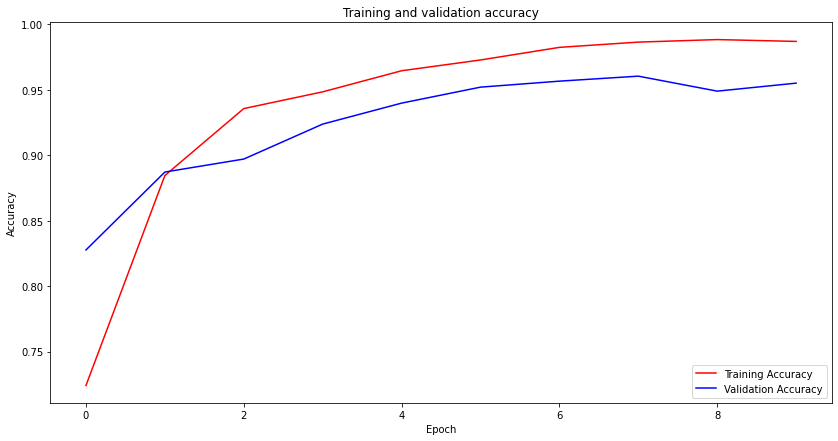

In [87]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

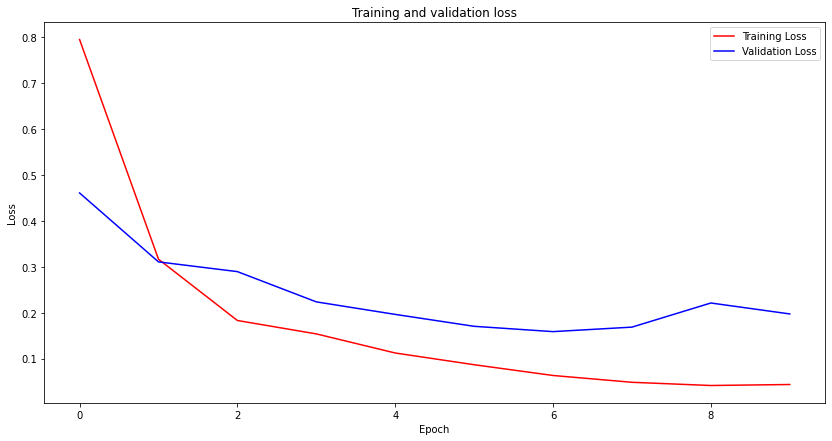

In [88]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')